Mean Absolute Error (MAE): 4.0157
Root Mean Squared Error (RMSE): 5.6027
R² Score: -4.9859


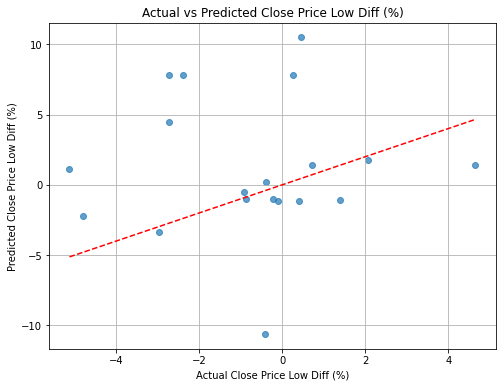

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('./stockanalysis/stock_analysis_results.csv')

# Convert net profit columns to numeric
def to_number(x):
    if pd.isnull(x):
        return None
    return pd.to_numeric(str(x).replace(',', '').replace('₹', '').replace('$', '').strip(), errors='coerce')

df['net_profit_actual'] = df['net_profit_actual'].apply(to_number)
df['net_profit_estimated'] = df['net_profit_estimated'].apply(to_number)
df['close_price_low'] = pd.to_numeric(df['end_close'], errors='coerce')
df['start_price_low'] = pd.to_numeric(df['start_close'], errors='coerce')

# Compute the percentage differences
df['net_profit_diff'] = (df['net_profit_actual'] - df['net_profit_estimated']) / df['net_profit_estimated'] * 100
df['close_low_diff'] = (df['close_price_low'] - df['start_price_low']) / df['start_price_low'] * 100

# Drop rows with missing values in either diff column
df = df.dropna(subset=['net_profit_diff', 'close_low_diff'])

# Prepare features and target
X = df[['net_profit_diff']]
y = df['close_low_diff']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor (no need for feature scaling)
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Close Price Low Diff (%)')
plt.ylabel('Predicted Close Price Low Diff (%)')
plt.title('Actual vs Predicted Close Price Low Diff (%)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

In [42]:
from datetime import time

def filter_trading_hours(df: pd.DataFrame) -> pd.DataFrame:
    """
    Filters the DataFrame to include only rows where the start and end timestamps
    are within market trading hours (9:30 AM to 3:30 PM IST).

    Args:
        df (pd.DataFrame): The input DataFrame containing 'start_timestamp' and 'end_timestamp' columns.

    Returns:
        pd.DataFrame: A DataFrame filtered to only include rows within trading hours.
    """
    # Ensure the timestamp columns are in datetime format
    df['board_announcement_time'] = pd.to_datetime(df['board_announcement_time'], errors='coerce')
    df['start_timestamp'] = pd.to_datetime(df['start_timestamp'], errors='coerce')
    df['end_timestamp'] = pd.to_datetime(df['end_timestamp'], errors='coerce')

    # Define trading hours
    trading_start = time(9, 30)  # 9:30 AM
    trading_end = time(15, 30)    # 3:30 PM

    # Filter rows where both start and end timestamps are within trading hours
    filtered_df = df[
        (df['board_announcement_time'].dt.time >= trading_start) &
        (df['board_announcement_time'].dt.time <= trading_end) &
        (df['start_timestamp'].dt.time >= trading_start) & 
        (df['start_timestamp'].dt.time <= trading_end) & 
        (df['end_timestamp'].dt.time >= trading_start) & 
        (df['end_timestamp'].dt.time <= trading_end) &
        (df['start_volume'] >= 2000)
    ]

    return filtered_df

In [43]:
filtered_df = filter_trading_hours(df)
filtered_df

,sc_id,stock_name,net_profit_actual,net_profit_estimated,nse_id,exchdisstime,board_announcement_time,start_timestamp,start_open,start_high,...,end_timestamp,end_open,end_high,end_low,end_close,end_volume,close_price_low,start_price_low,net_profit_diff,close_low_diff
0,HAL,Hindustan Aeron,3977,2665,HAL,14-May-2025 13:14:38,2025-05-14 13:14:38,2025-05-14 13:14:00+05:30,4743.00,4744.00,...,2025-05-14 13:54:00+05:30,4755.50,4757.80,4751.00,4753.00,11628.0,4753.00,4719.39,49.230769,0.712168
5,BPI02,Berger Paints,262,237,BERGEPAINT,14-May-2025 14:31:13,2025-05-14 14:31:13,2025-05-14 14:31:00+05:30,549.40,557.00,...,2025-05-14 15:11:00+05:30,557.90,558.00,555.50,555.50,29872.0,555.50,554.85,10.548523,0.117149
7,AI40,Apar Ind,250,220,APARINDS,14-May-2025 14:04:19,2025-05-14 14:04:19,2025-05-14 14:04:00+05:30,6832.50,6839.50,...,2025-05-14 14:44:00+05:30,6980.00,6987.50,6971.50,6984.50,751.0,6984.50,6804.00,13.636364,2.652851
13,VI16,V-Guard Ind,91,92,VGUARD,14-May-2025 14:26:40,2025-05-14 14:26:40,2025-05-14 14:26:00+05:30,380.70,388.45,...,2025-05-14 15:06:00+05:30,378.30,378.35,376.85,377.40,6402.0,377.40,387.90,-1.086957,-2.706883
17,GI13,Graphite India,50,86,GRAPHITE,14-May-2025 14:09:41,2025-05-14 14:09:41,2025-05-14 14:09:00+05:30,492.55,497.50,...,2025-05-14 14:49:00+05:30,489.20,489.40,488.50,488.90,4400.0,488.90,494.70,-41.860465,-1.172428
21,SC47,Sharda Crop,204,155,SHARDACROP,14-May-2025 14:47:33,2025-05-14 14:47:33,2025-05-14 14:47:00+05:30,576.85,584.00,...,2025-05-14 15:27:00+05:30,569.40,572.50,569.00,572.45,5447.0,572.45,583.00,31.612903,-1.809605
22,HCI,Hikal,50,25,HIKAL,14-May-2025 14:14:34,2025-05-14 14:14:34,2025-05-14 14:14:00+05:30,433.25,444.00,...,2025-05-14 14:54:00+05:30,420.40,420.70,420.00,420.45,1419.0,420.45,443.20,100.000000,-5.133123
27,GAI,GAIL,2492,2273,GAIL,13-May-2025 14:34:51,2025-05-13 14:34:51,2025-05-13 14:34:00+05:30,185.05,185.32,...,2025-05-13 15:14:00+05:30,183.25,183.46,183.10,183.35,133642.0,183.35,185.30,9.634844,-1.052348
28,C,Cipla,1222,1023,CIPLA,13-May-2025 13:41:46,2025-05-13 13:41:46,2025-05-13 13:41:00+05:30,1518.50,1522.10,...,2025-05-13 14:21:00+05:30,1516.70,1516.70,1515.00,1516.00,11145.0,1516.00,1510.10,19.452590,0.390703
29,ABC07,AB Capital,865,954,ABCAPITAL,13-May-2025 15:19:21,2025-05-13 15:19:21,2025-05-13 15:19:00+05:30,207.59,207.74,...,2025-05-13 15:29:00+05:30,202.31,202.78,201.55,202.51,92976.0,202.51,207.53,-9.329140,-2.418927


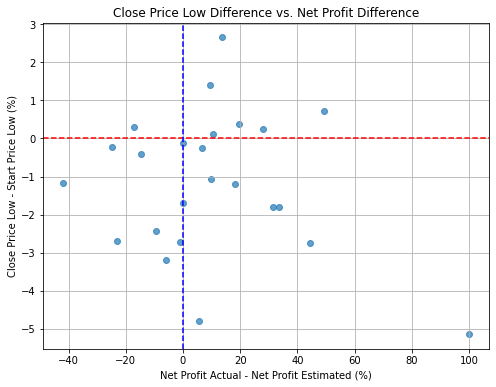

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(df['net_profit_diff'], df['close_low_diff'], alpha=0.7)
plt.xlabel('Net Profit Actual - Net Profit Estimated (%)')
plt.ylabel('Close Price Low - Start Price Low (%)')
plt.title('Close Price Low Difference vs. Net Profit Difference')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--')  # Optional: Add a horizontal line at y=0 for reference
plt.axvline(0, color='blue', linestyle='--')  # Optional: Add a vertical line at x=0 for reference
plt.show()

In [44]:
import pandas as pd

# Read the CSV file
#df = pd.read_csv('./stockanalysis/stock_analysis_results.csv')
df= filtered_df.copy()
# Convert net profit columns to numeric
def to_number(x):
    if pd.isnull(x):
        return None
    return pd.to_numeric(str(x).replace(',', '').replace('₹', '').replace('$', '').strip(), errors='coerce')

df['net_profit_actual'] = df['net_profit_actual'].apply(to_number)
df['net_profit_estimated'] = df['net_profit_estimated'].apply(to_number)
df['close_price_low'] = pd.to_numeric(df['end_close'], errors='coerce')
df['start_price_low'] = pd.to_numeric(df['start_close'], errors='coerce')

# Compute the percentage differences
df['net_profit_diff'] = (df['net_profit_actual'] - df['net_profit_estimated']) / df['net_profit_estimated'] * 100
df['close_low_diff'] = (df['close_price_low'] - df['start_price_low']) / df['start_price_low'] * 100

# Filter for positive net profit difference
positive_profit_df = df[df['net_profit_diff'] > 30]

# Calculate the average stock price % change for these cases
avg_stock_price_pct = positive_profit_df['close_low_diff'].mean()

print(f"If you invested only when net profit diff was positive, your average stock price % change would be: {avg_stock_price_pct:.2f}%")

If you invested only when net profit diff was positive, your average stock price % change would be: -2.15%


In [45]:
df

,sc_id,stock_name,net_profit_actual,net_profit_estimated,nse_id,exchdisstime,board_announcement_time,start_timestamp,start_open,start_high,...,end_timestamp,end_open,end_high,end_low,end_close,end_volume,close_price_low,start_price_low,net_profit_diff,close_low_diff
0,HAL,Hindustan Aeron,3977,2665,HAL,14-May-2025 13:14:38,2025-05-14 13:14:38,2025-05-14 13:14:00+05:30,4743.00,4744.00,...,2025-05-14 13:54:00+05:30,4755.50,4757.80,4751.00,4753.00,11628.0,4753.00,4719.39,49.230769,0.712168
5,BPI02,Berger Paints,262,237,BERGEPAINT,14-May-2025 14:31:13,2025-05-14 14:31:13,2025-05-14 14:31:00+05:30,549.40,557.00,...,2025-05-14 15:11:00+05:30,557.90,558.00,555.50,555.50,29872.0,555.50,554.85,10.548523,0.117149
7,AI40,Apar Ind,250,220,APARINDS,14-May-2025 14:04:19,2025-05-14 14:04:19,2025-05-14 14:04:00+05:30,6832.50,6839.50,...,2025-05-14 14:44:00+05:30,6980.00,6987.50,6971.50,6984.50,751.0,6984.50,6804.00,13.636364,2.652851
13,VI16,V-Guard Ind,91,92,VGUARD,14-May-2025 14:26:40,2025-05-14 14:26:40,2025-05-14 14:26:00+05:30,380.70,388.45,...,2025-05-14 15:06:00+05:30,378.30,378.35,376.85,377.40,6402.0,377.40,387.90,-1.086957,-2.706883
17,GI13,Graphite India,50,86,GRAPHITE,14-May-2025 14:09:41,2025-05-14 14:09:41,2025-05-14 14:09:00+05:30,492.55,497.50,...,2025-05-14 14:49:00+05:30,489.20,489.40,488.50,488.90,4400.0,488.90,494.70,-41.860465,-1.172428
21,SC47,Sharda Crop,204,155,SHARDACROP,14-May-2025 14:47:33,2025-05-14 14:47:33,2025-05-14 14:47:00+05:30,576.85,584.00,...,2025-05-14 15:27:00+05:30,569.40,572.50,569.00,572.45,5447.0,572.45,583.00,31.612903,-1.809605
22,HCI,Hikal,50,25,HIKAL,14-May-2025 14:14:34,2025-05-14 14:14:34,2025-05-14 14:14:00+05:30,433.25,444.00,...,2025-05-14 14:54:00+05:30,420.40,420.70,420.00,420.45,1419.0,420.45,443.20,100.000000,-5.133123
27,GAI,GAIL,2492,2273,GAIL,13-May-2025 14:34:51,2025-05-13 14:34:51,2025-05-13 14:34:00+05:30,185.05,185.32,...,2025-05-13 15:14:00+05:30,183.25,183.46,183.10,183.35,133642.0,183.35,185.30,9.634844,-1.052348
28,C,Cipla,1222,1023,CIPLA,13-May-2025 13:41:46,2025-05-13 13:41:46,2025-05-13 13:41:00+05:30,1518.50,1522.10,...,2025-05-13 14:21:00+05:30,1516.70,1516.70,1515.00,1516.00,11145.0,1516.00,1510.10,19.452590,0.390703
29,ABC07,AB Capital,865,954,ABCAPITAL,13-May-2025 15:19:21,2025-05-13 15:19:21,2025-05-13 15:19:00+05:30,207.59,207.74,...,2025-05-13 15:29:00+05:30,202.31,202.78,201.55,202.51,92976.0,202.51,207.53,-9.329140,-2.418927
